In [20]:
from model_evaluation import model_selection, model_selection_random
from visual_utils import plot_scores
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
kind="de_novo"

In [22]:
P_FOLDER = f"predictions/{kind}"

In [17]:
best_p_name, scores_specknn_random_val = model_selection_random(P_FOLDER, "spec_val_5000", kw="specknnR", return_details=True)



specknnR_3_.1


/auto/brno6/home/xstary1/raims/metrics.py:232: RuntimeWarning: Mean of empty slice
  "mp": np.nanmean(recs_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:234: RuntimeWarning: Mean of empty slice
  "mf1": np.nanmean(f1_some, axis=1),
/auto/brno6/home/xstary1/raims/metrics.py:235: RuntimeWarning: Mean of empty slice
  "mps": np.nanmean(precs_m, axis=1)


specknnR_1_.8
specknnR_1_.5
specknnR_10_.8
specknnR_10_.1
specknnR_10_.2
specknnR_1_.1
specknnR_3_.8
specknnR_3_.2
specknnR_1_.2
specknnR_3_.5
specknnR_10_.5


In [18]:
import numpy as np

In [19]:
for key in scores_specknn_random_val:
    print(key, np.nanmean(scores_specknn_random_val[key]["mf1"]))

specknnR_3_.1 0.27125054675770144
specknnR_1_.8 0.42297173746554784
specknnR_1_.5 0.44776518090323136
specknnR_10_.8 0.3120184011278905
specknnR_10_.1 0.28781718293051994
specknnR_10_.2 0.37791810592954256
specknnR_1_.1 0.25661924322155044
specknnR_3_.8 0.38738170996618904
specknnR_3_.2 0.3556400064597496
specknnR_1_.2 0.33122550722802985
specknnR_3_.5 0.4556623656503752
specknnR_10_.5 0.4304977182060619


In [13]:
top = ["specknnR_1_.5", "specknnR_3_.5", "specknnR_10_.5"]
scores_specknn_random_val_top = {key:scores_specknn_random_val[key] for key in top}

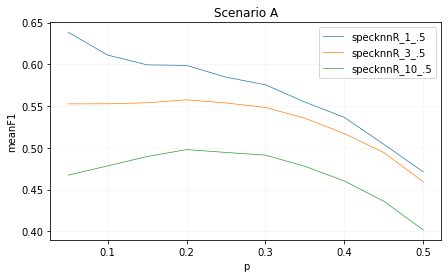

In [14]:
#scores_random = {score:scores_specknn_random_val[score] for score in scores_specknn_random_val if len(score.split("_"))==3}
probs = [0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
orderer_f = lambda x: (int(x.split("_")[1]), float(x.split("_")[2]))
hue_f = lambda x: ["1", "3", "10"].index(x.split("_")[1])
plot_scores(scores_specknn_random_val_top, metrics="mf1", x=probs,
            orderer_f=orderer_f,hue_f=hue_f, grouper_f=lambda x: x[0],
            title= "Scenario B" if kind=="de_novo" else "Scenario A",
            xlabel= "p", ylabel="meanF1",
            save_to_path=f"figures/{kind}/selection/specknn_random_val_f1_sel.pdf")

In [ ]:
best_p_name, scores_lstm_val = model_selection(P_FOLDER, "gen_val", kw="lstm", up_to_k=20, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)
plot_scores(scores_lstm_val, metrics="mpi")

gpt2_embd300_dst
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.2
skipped spectrum - unknown peak
[25995 27731 27989 28015 28032 28030 28033 28029 28031 27989 27957 27905
 27853 27769 27694 27609 27517 27435 27333 27241]
gpt2_h6l6_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.2
skipped spectrum - unknown peak
[25995 27731 27989 28015 28032 28030 28033 28029 28031 27989 27957 27905
 27853 27769 27694 27609 27517 27435 27333 27241]
gpt2_quad_intens_dst
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.2
skipped spectrum - unknown peak
[25995 27731 27989 28015 28032 28030 28033 28029 28031 27989 27957 27905
 27853 27769 27694 27609 27517 27435 27333 27241]
gpt2_agnostic_dst
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, t

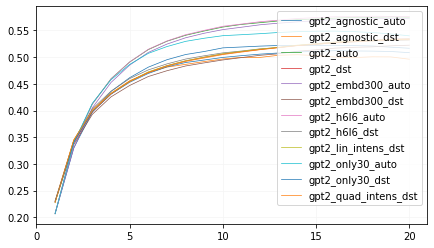

In [28]:
best_p_name, scores_gpt_val = model_selection(P_FOLDER, "hugg_val", kw="gpt", up_to_k=20, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)
plot_scores(scores_gpt_val, metrics="mpi")

In [29]:
scores_gpt_sel = scores_gpt_val
scores_gpt_sel.pop("gpt2_embd300_dst")
scores_gpt_sel.pop("gpt2_agnostic_dst")
scores_gpt_sel.pop("gpt2_only30_dst")
scores_gpt_sel.pop("gpt2_agnostic_auto")
# scores_gpt_sel.pop("gpt2_agnostic_auto")
# scores_gpt_sel.pop("gpt2_agnostic_auto")
# scores_gpt_sel.pop("gpt2_agnostic_auto")


{'mp': array([0.2885514 , 0.37354641, 0.41583434, 0.4383784 , 0.45395442,
        0.4629113 , 0.46937258, 0.47294217, 0.47535376, 0.47794144,
        0.47869509, 0.47470206, 0.47343915, 0.46901408, 0.4661118 ,
        0.46208155, 0.46030703, 0.45611524, 0.45044978, 0.44326653]),
 'mj': array([0.14939399, 0.20121429, 0.22674861, 0.24043891, 0.2499399 ,
        0.25534536, 0.25949506, 0.26128809, 0.26247815, 0.26383352,
        0.26390606, 0.26094882, 0.25955638, 0.256345  , 0.25405914,
        0.25107399, 0.24992284, 0.24668761, 0.24298731, 0.2381932 ]),
 'mpi': array([0.20642067, 0.32969781, 0.39714529, 0.43571352, 0.46144808,
        0.48118462, 0.49510371, 0.50480967, 0.51045876, 0.51728738,
        0.51891026, 0.52056357, 0.52173552, 0.52146449, 0.52207102,
        0.52181613, 0.5215954 , 0.5207894 , 0.51856872, 0.51655122]),
 'mji': array([0.14658078, 0.22981093, 0.27716199, 0.30549297, 0.32574614,
        0.34159081, 0.35281826, 0.36079835, 0.36517648, 0.37077129,
        0.371892

In [30]:
scores_gpt_sel.keys()

dict_keys(['gpt2_h6l6_auto', 'gpt2_quad_intens_dst', 'gpt2_h6l6_dst', 'gpt2_only30_auto', 'gpt2_auto', 'gpt2_dst', 'gpt2_embd300_auto', 'gpt2_lin_intens_dst'])

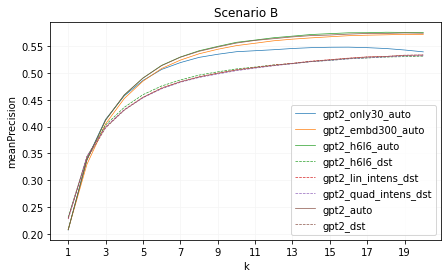

In [32]:
hue_f = lambda x: ["only30","embd300","h6l6","lin", "quad"].index(x.split("_")[1]) \
if len(x.split("_")) > 2 else 5

orderer_f = lambda x: str(hue_f(x)) + x

plot_scores(scores_gpt_sel, metrics="mpi", grouper_f=lambda x: x.split("_")[-1],
            orderer_f=orderer_f,hue_f=hue_f,
            title= "Scenario B" if kind=="de_novo" else "Scenario A",
            xlabel= "k", ylabel="meanPrecision",
            save_to_path=f"figures/{kind}/selection/gpt_val_prec.pdf")

peakknn
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
[22921 22921 22921 22921 22884 22854 22818 22771 22714 22640 22575 22507
 22415 22305 22206 22070 21926 21777 21630 21453 21291 21091 20896 20708
 20524 20322 20108 19918 19724 19525]
[22921 22921 22921 22921 22884 22854 22818 22771 22714 22640 22575 22507
 22415 22305 22206 22070 21926 21777 21630 21453 21291 21091 20896 20708
 20524 20322 20108 19918 19724 19525]
Selected up to k=30, l=None, to_rel_inten=0.2
[21445 22674 22786 22702 22589 22429 22226 22001 21760 21503 21235 20922
 20630 20333 20016 19702 19394 19071 18748 18416 18083 17771 17448 17158
 16845 16533 16160 15833 15506 15204]
[21445 22674 22786 22702 22589 22429 22226 22001 21760 21503 21235 20922
 20630 20333 20016 19702 19394 19071 18748 18416 18083 17771 17448 17158
 16845 16533 16160 15833 15506 15204]
specknn
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
[22921 22921 22921 22921 22884 22854 22818 22771 22714

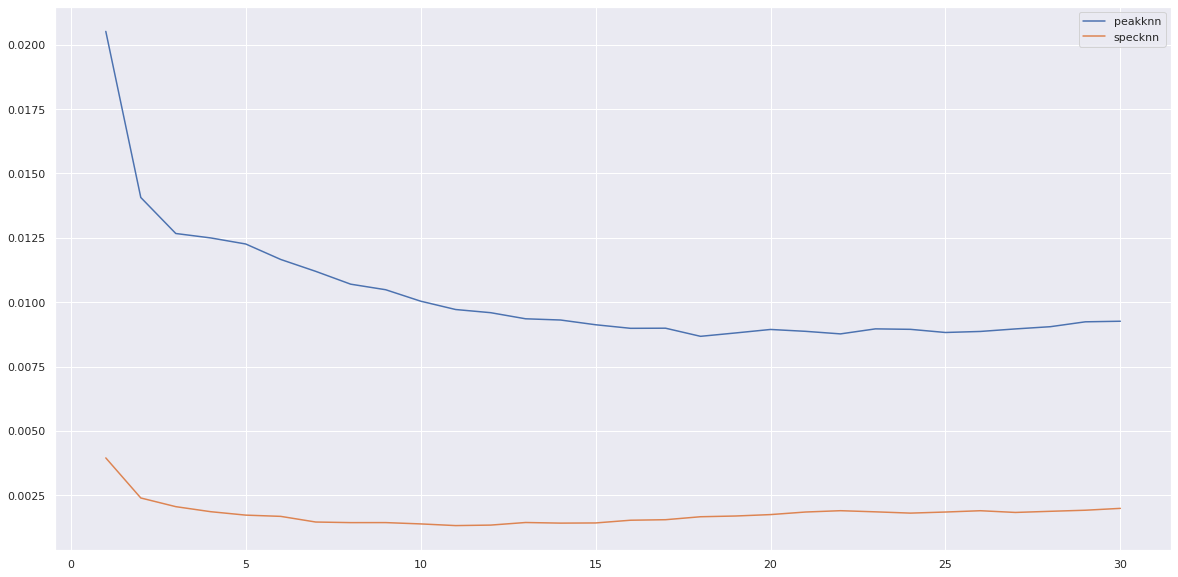

In [43]:
best_p_name, scores_g2v_val = model_selection(P_FOLDER, "gen_val", kw="knn", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)
plot_scores(scores_g2v_val, metrics="mpi")

specknn_1
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[4703 4953 4989 5000 5000 5000 4998 4999 5000 4993 4986 4979 4972 4962
 4946 4927 4919 4902 4878 4861 4823 4792 4759 4733 4693 4656 4610 4560
 4521 4483]
specknn_5
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[4703 4953 4989 5000 5000 5000 4998 4999 5000 4993 4986 4979 4972 4962
 4946 4927 4919 4902 4878 4861 4823 4792 4759 4733 4693 4656 4610 4560
 4521 4483]
specknn_10
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[4703 4953 4989 5000 5000 5000 4998 4999 5000 4993 4986 4979 4972 4962
 4946 4927 4919 4902 4878 4861 4823 4792 4759 4733 4693 4656 4610 4560
 4521 4483]
specknn_3
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[4703 4953 4989 5

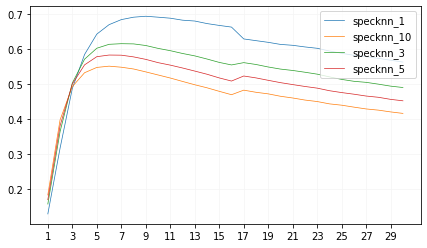

In [6]:
best_p_name, scores_baseline_val = model_selection(P_FOLDER, "spec_val_5000", kw="specknn_", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)
plot_scores(scores_baseline_val, metrics="mpi")

specknn_1
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]
specknn_3
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.2
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799 21656 21519 21381 21214
 21040 20846 20638 20437 20264 20044]


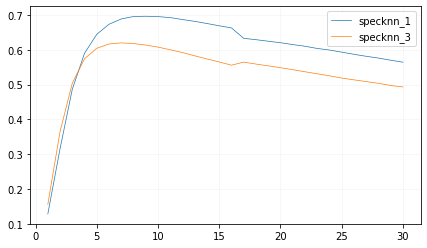

In [8]:
best_p_name, scores_baseline_val = model_selection(P_FOLDER, "spec_test", kw="specknn_", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None)
plot_scores(scores_baseline_val, metrics="mpi")

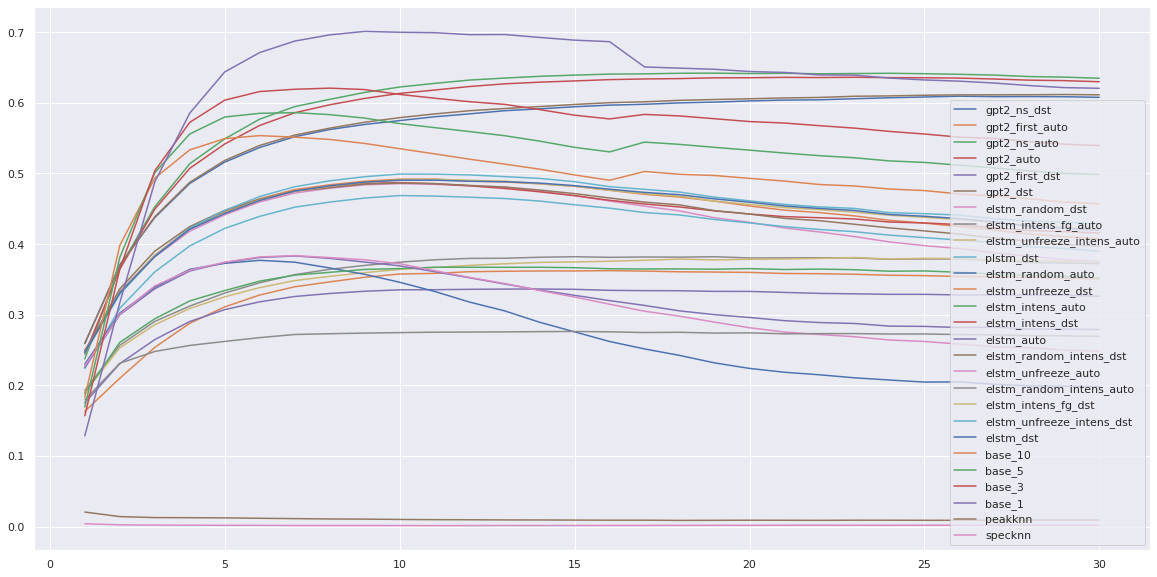

In [47]:
plot_scores({**scores_gpt_val, **scores_lstm_val, **scores_baseline_val, **scores_g2v_val}, metrics="mpi")

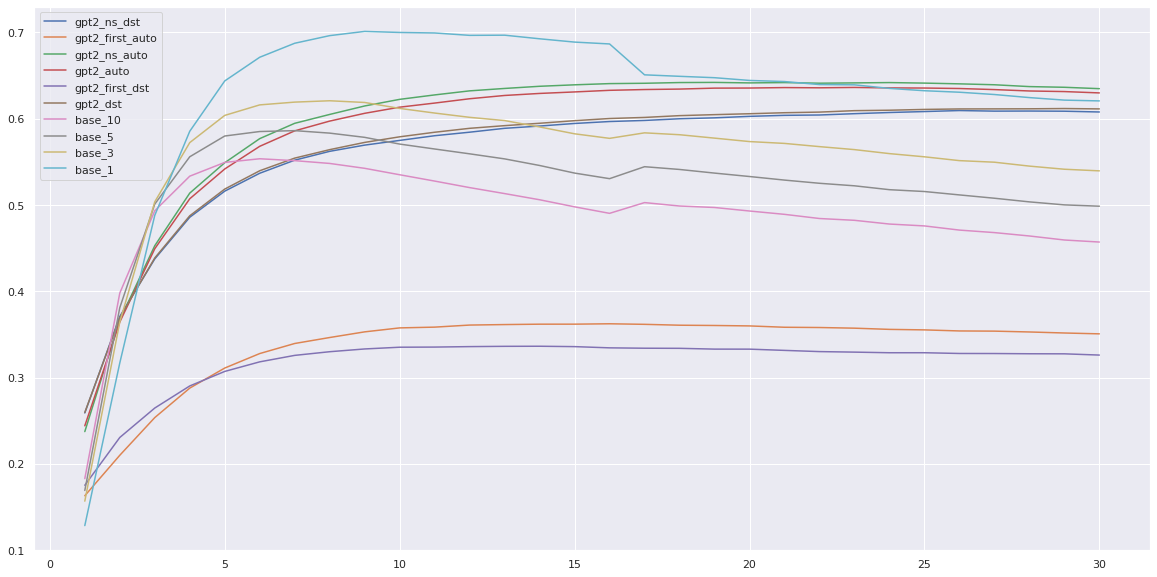

In [48]:
plot_scores({**scores_gpt_val, **scores_baseline_val}, metrics="mpi")

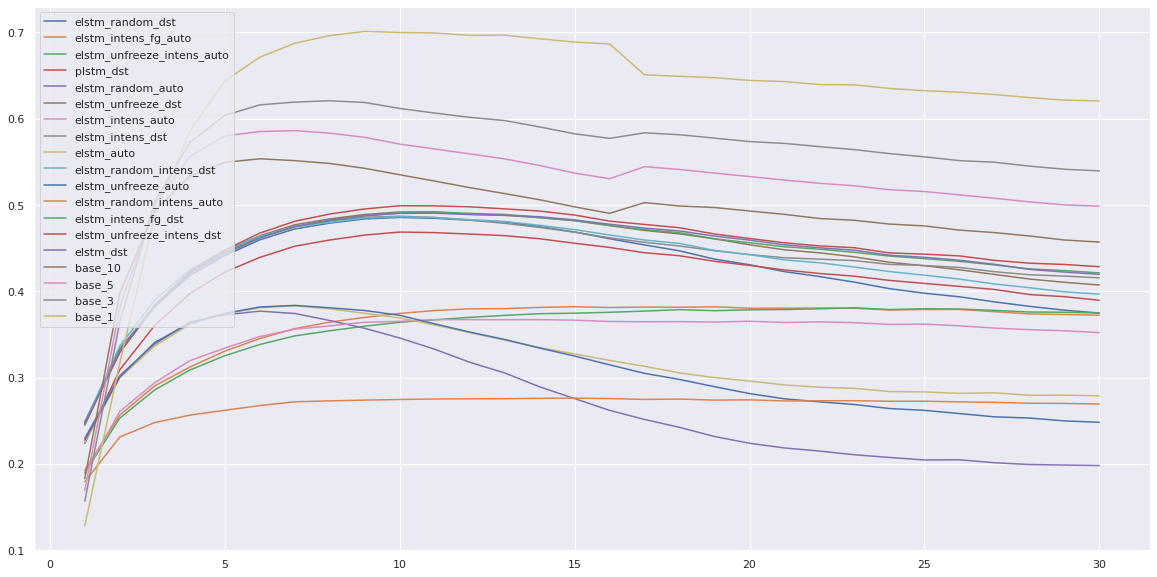

In [49]:
plot_scores({**scores_lstm_val, **scores_baseline_val}, metrics="mpi")

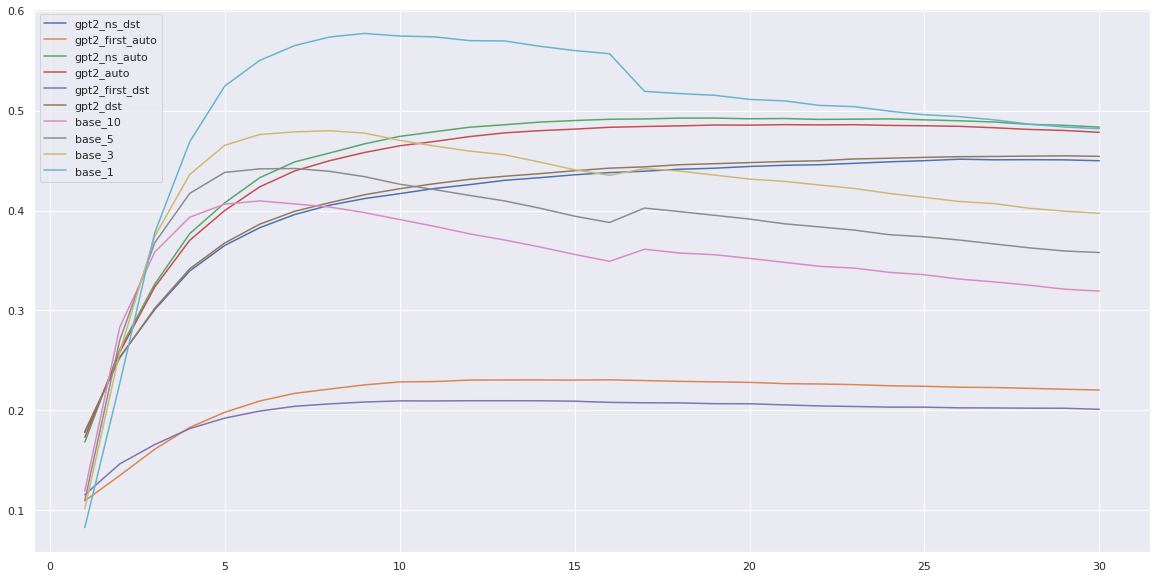

In [50]:
plot_scores({**scores_gpt_val, **scores_baseline_val}, metrics="mji")

In [39]:
yes_int = {key: scores_lstm_val[key] for key in scores_lstm_val if "inte" in key}

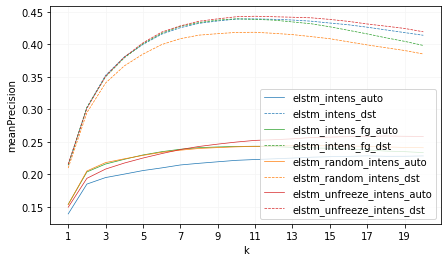

In [52]:
plot_scores(yes_int, grouper_f=lambda x: x.split("_")[-1], hue_f=lambda x: 2 if "fg" in x else ["i", "r", "x", "u"].index(x.split("_")[1][0]), metrics="mpi",\
           save_to_path=f"figures/{kind}/meta/lstm_val_intens.pdf", xlabel="k", ylabel="meanPrecision")

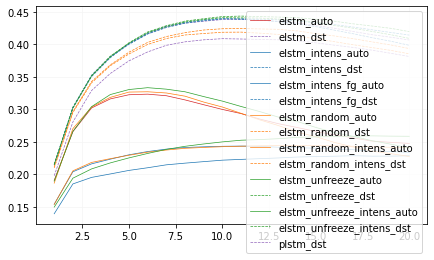

In [41]:
plot_scores(scores_lstm_val, grouper_f=lambda x: x.split("_")[-1], hue_f=lambda x: ["i", "r", "u", "a", "d"].index(x.split("_")[1][0]), metrics="mpi")

In [42]:
no_int = {key: scores_lstm_val[key] for key in scores_lstm_val if "inte" not in key}

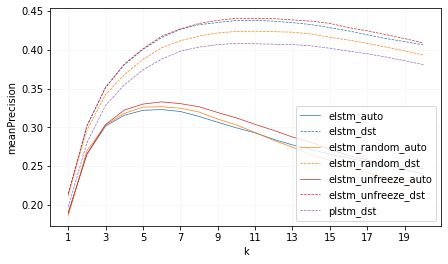

In [53]:
plot_scores(no_int, grouper_f=lambda x: x.split("_")[-1], \
            hue_f=lambda x: 0 if x[0] == "e" and x[6] < "e" else ["i", "r","a", "u", "d"].index(x.split("_")[1][0]), metrics="mpi",\
           save_to_path=f"figures/{kind}/meta/lstm_val_no_intens.pdf",  xlabel="k", ylabel="meanPrecision")